**\# Imports**

In [97]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

\# Definindo acesso

In [98]:
server = 'mvpserversql.database.windows.net' 
database = 'mvpdatabase' 
username = 'englucasportoadm' 
password = 'S3nhaportoadm!'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


**\# Carga dos dados**

In [101]:
query = "SELECT  [Regiao],[BCG],[Rotavirus Humano],[Meningococo C],[Hepatite B],[Penta],[Pneumococica],[Poliomielite],[Febre Amarela],[Triplice Bacteriana(DTP)],[Triplice Viral  D1],[Triplice Viral  D2],[Ano] FROM [dbo].[vacinas_anuais]"
df = pd.read_sql(query, cnxn)


In [102]:
df.head()

,Regiao,BCG,Rotavirus Humano,Meningococo C,Hepatite B,Penta,Pneumococica,Poliomielite,Febre Amarela,Triplice Bacteriana(DTP),Triplice Viral D1,Triplice Viral D2,Ano
0,1 Regiao Norte,"103,72","83,09","87,19","85,85","85,08","75,00","88,16","75,34","71,62","85,60","62,76",2015
1,2 Regiao Nordeste,"105,52","94,25","97,40","96,77","95,93","93,29","100,44","38,90","86,18","95,31","80,35",2015
2,3 Regiao Sudeste,"104,76","98,52","100,81","101,39","99,13","99,01","100,52","31,17","90,23","99,92","86,97",2015
3,4 Regiao Sul,"106,00","98,23","101,48","99,20","98,40","98,44","95,57","58,07","84,41","96,12","76,54",2015
4,5 Regiao Centro-Oeste,"105,44","95,27","97,35","96,77","95,17","92,76","97,88","87,17","83,68","93,73","72,57",2015


In [103]:
df.replace(',', '.', regex=True, inplace=True)

In [105]:
colunas = ['BCG', 'Rotavirus Humano', 'Meningococo C', 'Hepatite B',
       'Penta', 'Pneumococica', 'Poliomielite', 'Febre Amarela',
       'Triplice Bacteriana(DTP)','Triplice Viral  D1','Triplice Viral  D2']
for col in colunas :
    df[col] = df[col].astype(float)

**\# Primeira pergunta:  Temos queda na vacinação por Imuno em todo Brasil?**

In [106]:
df_brasil = df[df['Regiao'] == 'Total']

In [107]:
df_brasil.head()

,Regiao,BCG,Rotavirus Humano,Meningococo C,Hepatite B,Penta,Pneumococica,Poliomielite,Febre Amarela,Triplice Bacteriana(DTP),Triplice Viral D1,Triplice Viral D2,Ano
5,Total,105.08,95.35,98.19,97.74,96.30,94.23,98.29,46.31,85.78,96.07,79.94,2015
11,Total,95.55,88.98,91.68,105.19,89.27,95.00,84.43,44.59,64.28,95.41,76.71,2016
17,Total,107.28,93.44,96.36,96.42,94.85,93.45,96.76,46.86,86.36,112.80,92.88,2014
23,Total,107.42,93.52,99.70,100.56,95.89,93.57,100.71,51.50,90.96,107.46,68.87,2013
29,Total,97.98,85.12,87.44,84.40,84.24,92.15,84.74,47.37,72.40,86.24,72.94,2017


In [108]:
df_brasil_melted = df_brasil.melt(id_vars=['Regiao', 'Ano'],
                                var_name = 'Imuno',
                                value_name = 'CV')
df_brasil_melted.head()


,Regiao,Ano,Imuno,CV
0,Total,2015,BCG,105.08
1,Total,2016,BCG,95.55
2,Total,2014,BCG,107.28
3,Total,2013,BCG,107.42
4,Total,2017,BCG,97.98


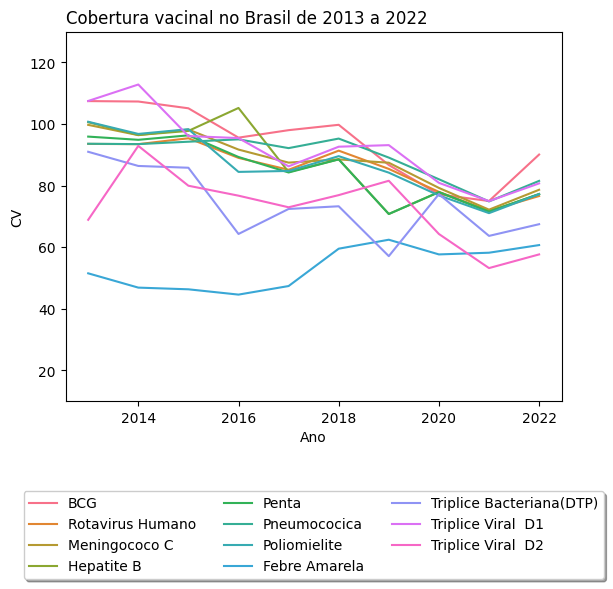

In [110]:
fig = plt.figure()
ax = plt.subplot(111)

sns.lineplot(df_brasil_melted, x='Ano', y='CV', hue='Imuno')
plt.ylim(10, 130)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Cobertura vacinal no Brasil de 2013 a 2022', loc='left')
plt.show()

Podemos notar no Brasil que todas as vacinas, com exceção da Febre Amarela, tivemos uma queda na Cobertura Vacinal esteve em queda até o ano de 2021, quando tivemos uma ligeira subida.

**\# Segunda pergunta:  A queda que percebemos são iguais em todas as regiões do país?**

In [111]:
df_regioes = df[df['Regiao'] != 'Total']

df_regioes_melted = df_regioes.melt(id_vars=['Regiao', 'Ano'],
                                var_name = 'Imuno',
                                value_name = 'CV')
df_regioes_melted.head()

,Regiao,Ano,Imuno,CV
0,1 Regiao Norte,2015,BCG,103.72
1,2 Regiao Nordeste,2015,BCG,105.52
2,3 Regiao Sudeste,2015,BCG,104.76
3,4 Regiao Sul,2015,BCG,106.00
4,5 Regiao Centro-Oeste,2015,BCG,105.44


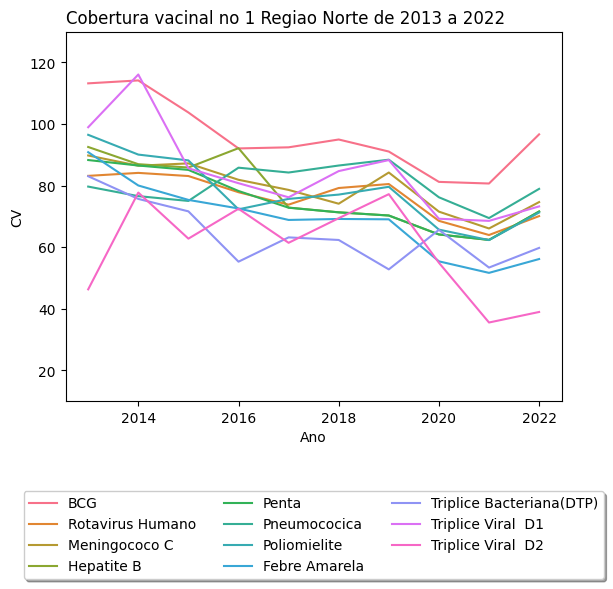

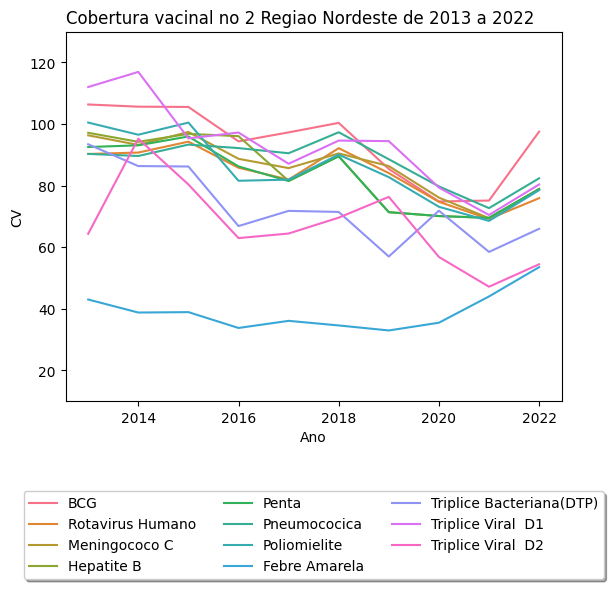

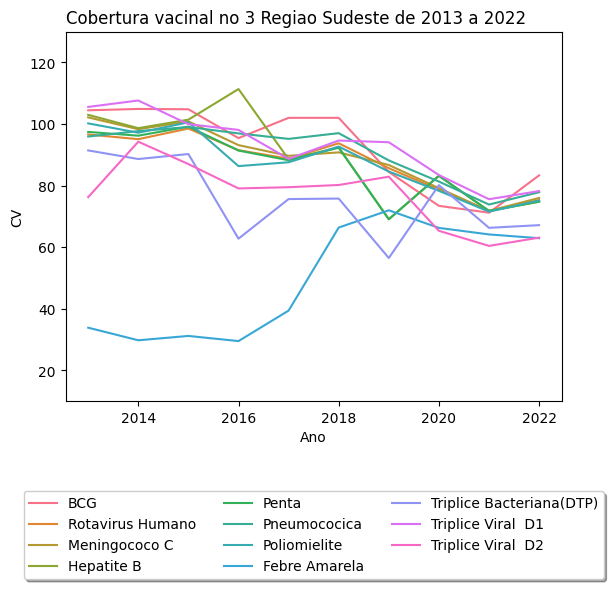

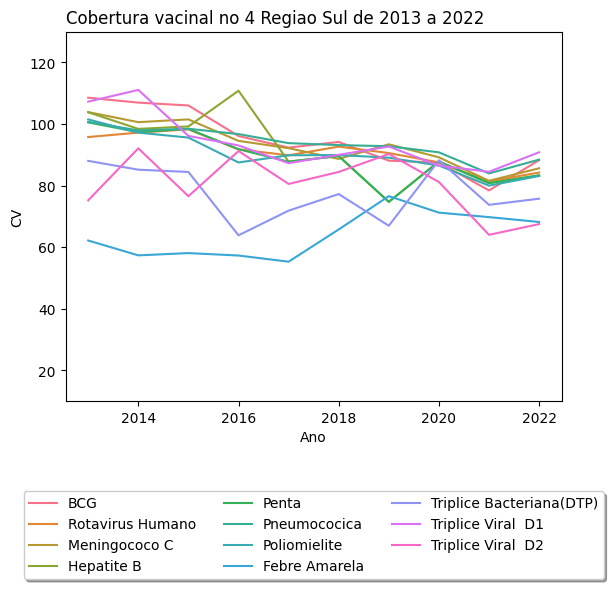

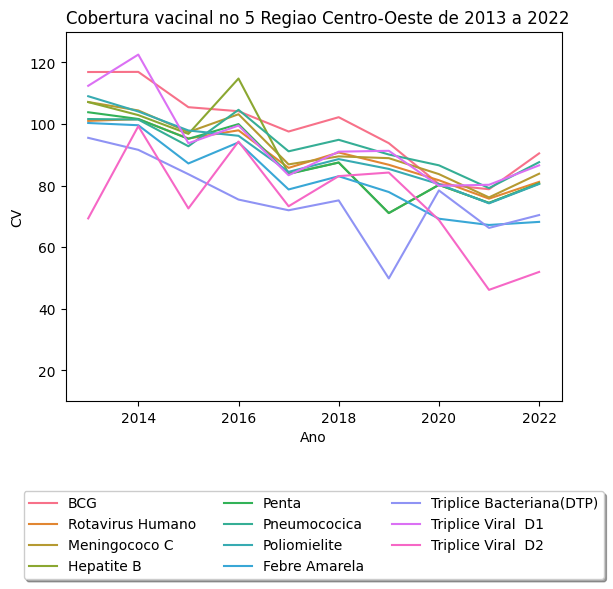

In [112]:
for regiao in df_regioes_melted.Regiao.unique():
    df_show = df_regioes_melted[df_regioes_melted.Regiao == regiao]
    fig = plt.figure()
    ax = plt.subplot(111)

    sns.lineplot(df_show, x='Ano', y='CV', hue='Imuno')
    plt.ylim(10, 130)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
            ncol=3, fancybox=True, shadow=True)
    plt.title(f'Cobertura vacinal no {regiao} de 2013 a 2022', loc='left')
    plt.show()

Sobre os dados das regiões do país:

> \- Região Norte:

> > \- Houve uma queda parecida na maioria das vacinas, porém o nível de vacinação em Febre Amarela nesta região sempre foi maior que o total do país.
> 
> <span style="background-color: rgb(255, 255, 254); color: var(--vscode-foreground);">- Região Nordeste:</span>  
> 
> > \- Houve uma queda parecida na maioria das vacinas, porém o nível de vacinação em Febre Amarela nesta região sempre foi menor que o total do país.  
> 
> <span style="background-color: rgb(255, 255, 254); color: var(--vscode-foreground);">- Região Sudeste:</span>  
> 
> > \- Houve uma queda parecida na maioria das vacinas, porém o nível de vacinação em Febre Amarela nesta região houve um crescimento ao invés de queda .
> 
> > \- A queda era menor até o ano de 2018.
> 
> <span style="background-color: rgb(255, 255, 254); color: var(--vscode-foreground);">- Região Sul:</span>  
> 
> > \- Houve uma queda parecida na maioria das vacinas, porém o nível de vacinação em Febre Amarela nesta região houve um crescimento ao invés de queda.
> 
> > \- A queda era menor até o ano de 2018.  
> 
> <span style="background-color: rgb(255, 255, 254); color: var(--vscode-foreground);">- Região Centro-Oeste:</span>  
> 
> > \- Houve uma queda parecida na maioria das vacinas, <span style="color: var(--vscode-foreground);">porém o nível de vacinação em Febre Amarela nesta região sempre foi maior que o total do país.</span>

<span style="color: #008000;"><b># Pontos interessantes que podemos analisar</b></span>

\- Febre Amarela:

É uma doença endêmica da região amazônica, [fonte](https:\www.gov.br\saude\pt-br\assuntos\saude-de-a-a-z\f\febre-amarela#:~:text=Atualmente%2C%20a%20febre%20amarela%20silvestre,reemerg%C3%AAncia%20do%20v%C3%ADrus%20no%20Pa%C3%ADs.), sendo assim os dados nos trazem a explicação do motivo pelas regiões Norte e Centro-Oeste terem uma cobertura vacinal maior. A conciência da população ainda é muito voltada para proteção, apesar dos constantes desincentivos que tivemos nos últimos tempos.  
Em 2017 começamos a ter surtos de febre amarela na região sudeste, temos casos demonstrados [aqui](https:\www.em.com.br\app\noticia\gerais\2019\02\19\interna_gerais,1031953\virus-da-febre-amarela-circula-por-minas-que-tem-cerca-de-3-milhoes-se.shtml), [aqui](https:\agenciabrasil.ebc.com.br\saude\noticia\2019-02\febre-amarela-estados-do-sul-e-sudeste-tem-vacinacao-abaixo-da-meta) e [aqui](https:\g1.globo.com\bemestar\noticia\2018\10\09\brasil-teve-483-mortes-por-febre-amarela-no-ultimo-ano.ghtml). Logo podemos ver que apesar abaixo da totalidade, tivemos um crescimento deste tipo de imunização.

\- Tríplice Viral:

Temos uma grande queda, principalmente na segunda dose, um dos maiores problemas para este caso é o retorno do [sarampo](https:\bvsms.saude.gov.br\as-razoes-da-queda-na-vacinacao\) como doença que aflinge nossa população, mesmo tendo sido eliminada no Brasil até 2016.

**\# Consolidado por Imuno**

In [116]:


df_melted = df.melt(id_vars=['Regiao', 'Ano'],
                            var_name = 'Imuno',
                            value_name = 'CV')
df_melted.head(10)

,Regiao,Ano,Imuno,CV
0,1 Regiao Norte,2015,BCG,103.72
1,2 Regiao Nordeste,2015,BCG,105.52
2,3 Regiao Sudeste,2015,BCG,104.76
3,4 Regiao Sul,2015,BCG,106.00
4,5 Regiao Centro-Oeste,2015,BCG,105.44
5,Total,2015,BCG,105.08
6,1 Regiao Norte,2016,BCG,92.05
7,2 Regiao Nordeste,2016,BCG,94.34
8,3 Regiao Sudeste,2016,BCG,95.40
9,4 Regiao Sul,2016,BCG,96.07


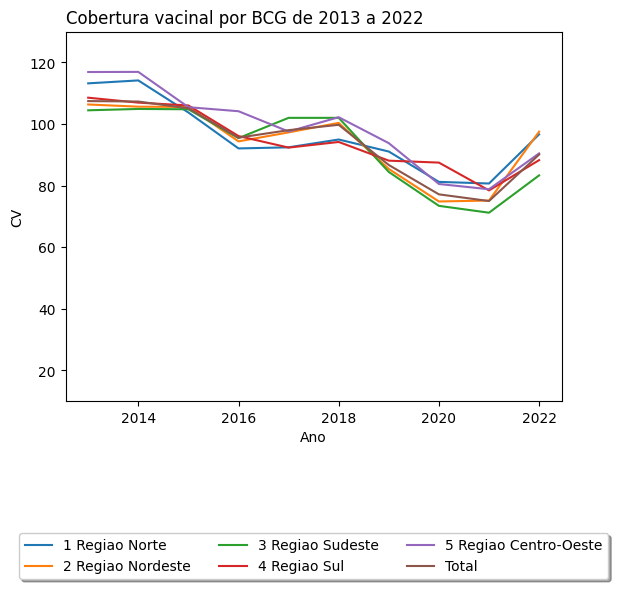

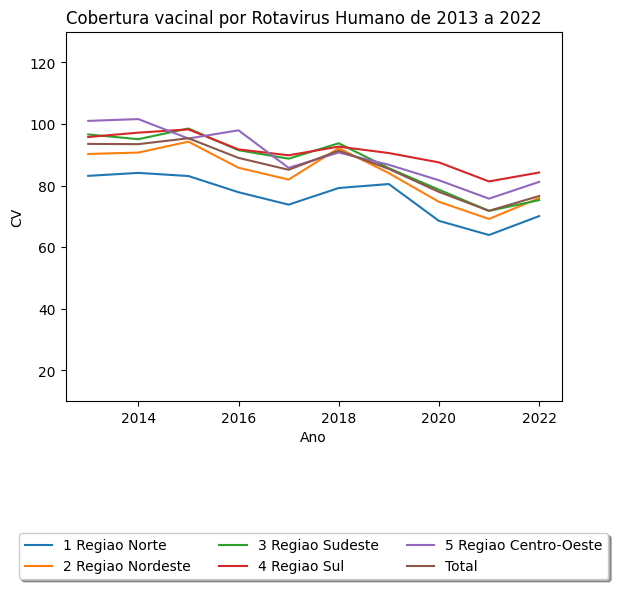

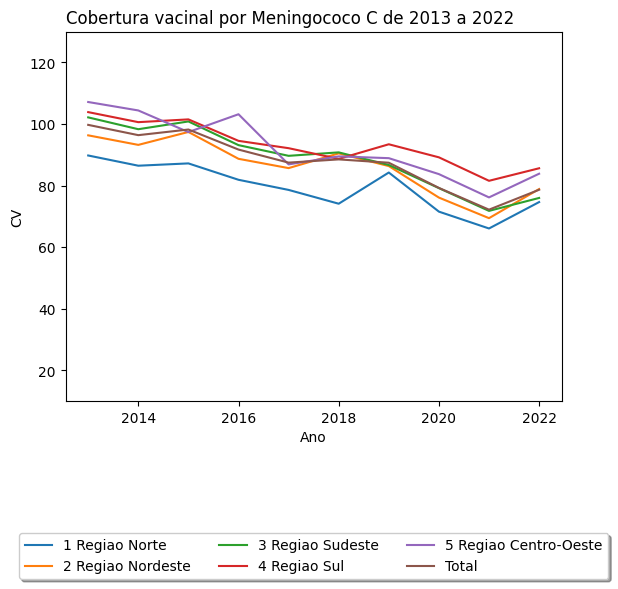

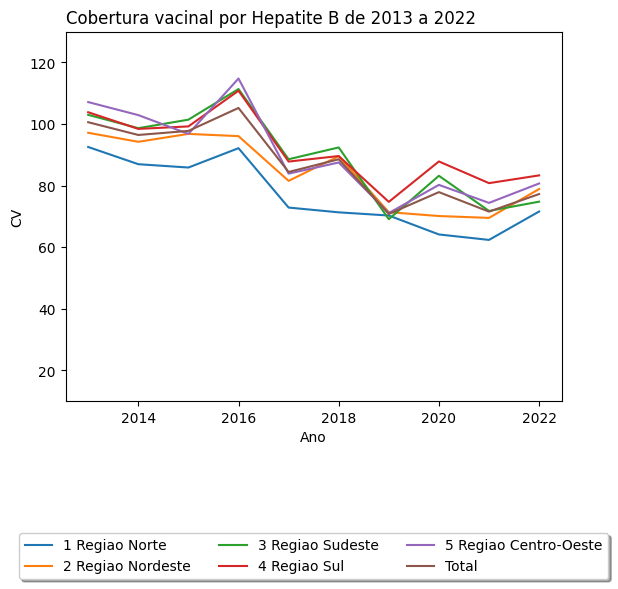

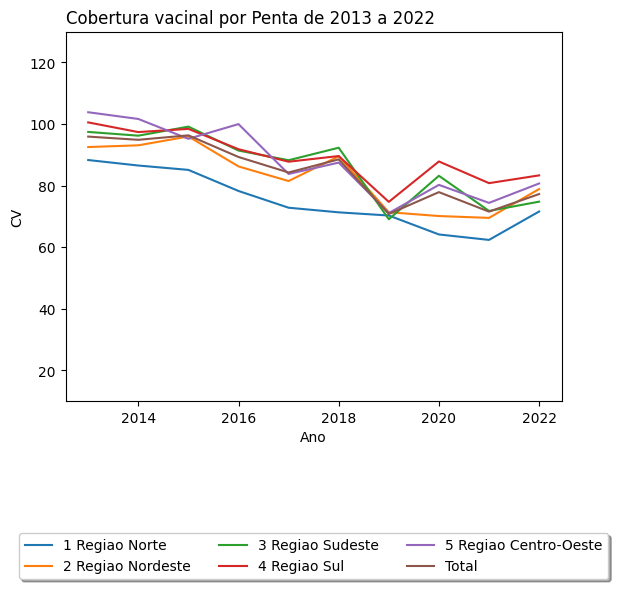

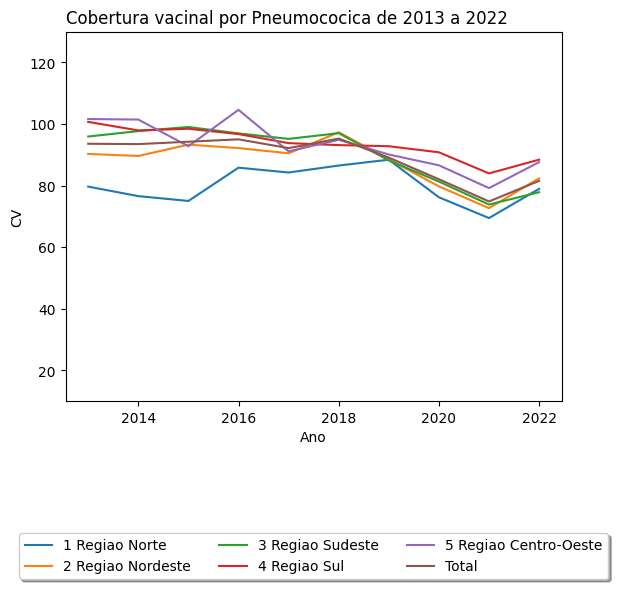

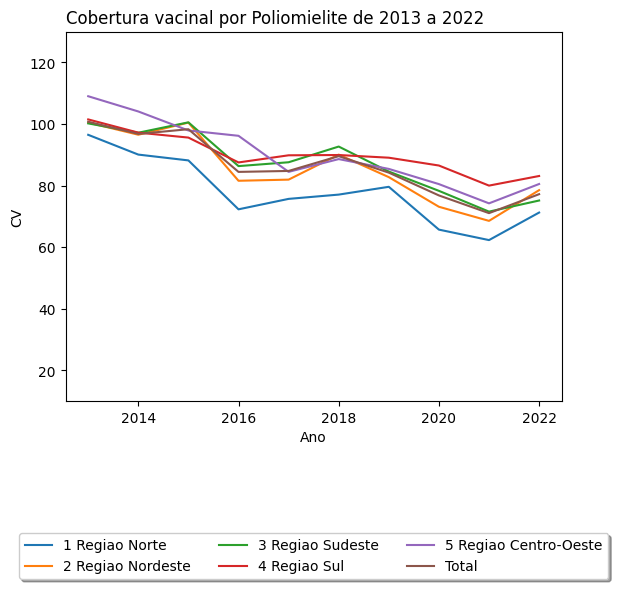

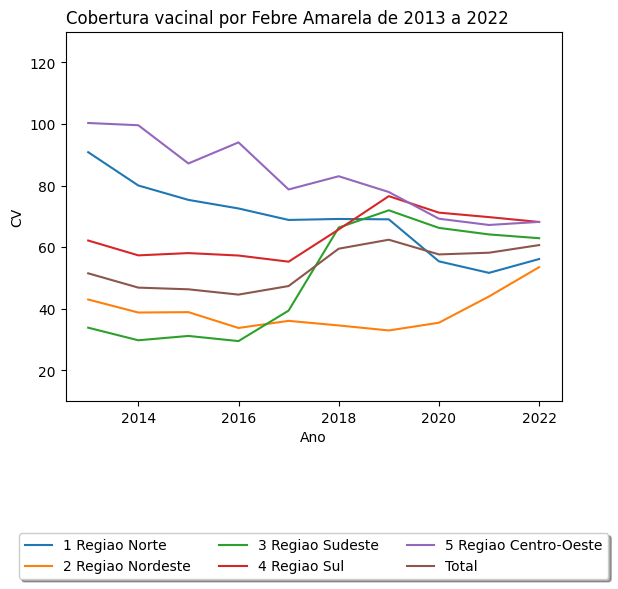

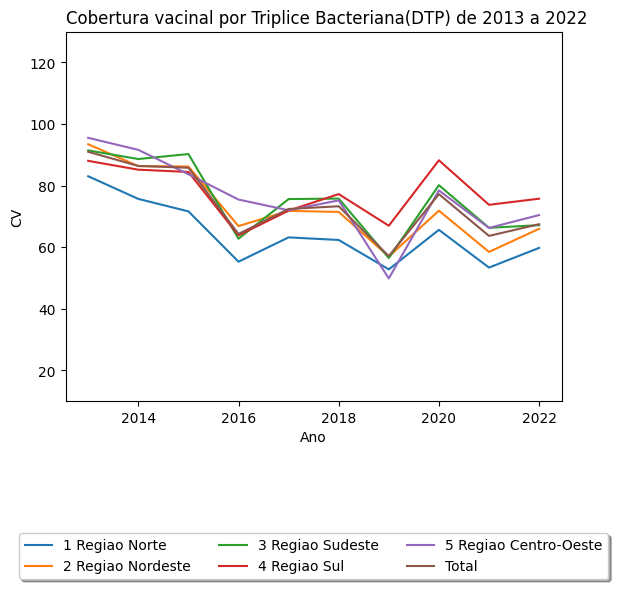

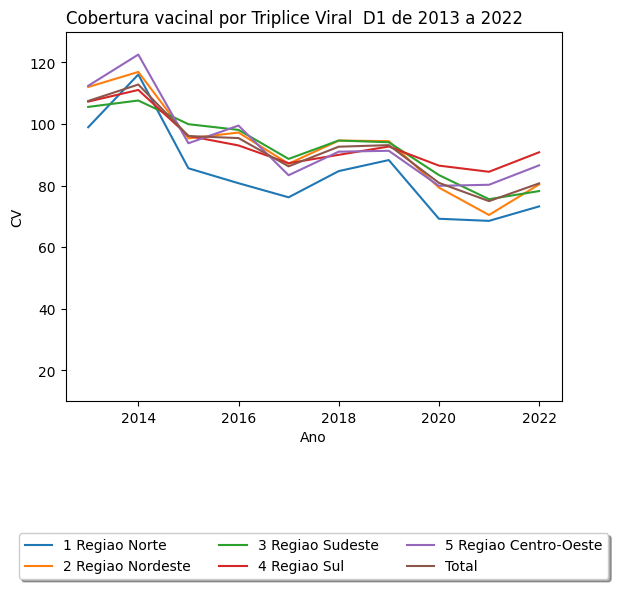

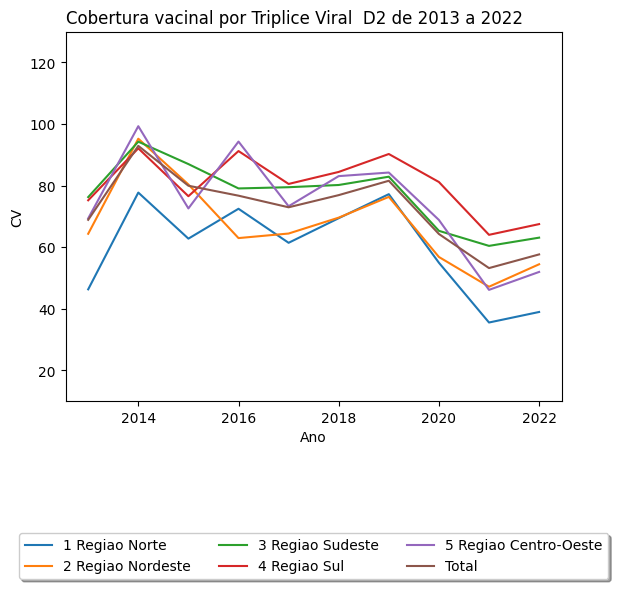

In [118]:
for imuno in df_melted.Imuno.unique():
    df_show = df_melted[df_melted.Imuno == imuno]
    fig = plt.figure()
    ax = plt.subplot(111)

    sns.lineplot(df_show, x='Ano', y='CV', hue='Regiao')
    plt.ylim(10, 130)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
            ncol=3, fancybox=True, shadow=True)
    plt.title(f'Cobertura vacinal por {imuno} de 2013 a 2022', loc='left')
    plt.show()